<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/Adaboosting_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#All necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [5]:
#Load dataset
X,y = load_breast_cancer(return_X_y=True)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

Decision Stump Accuracy: 0.8947368421052632


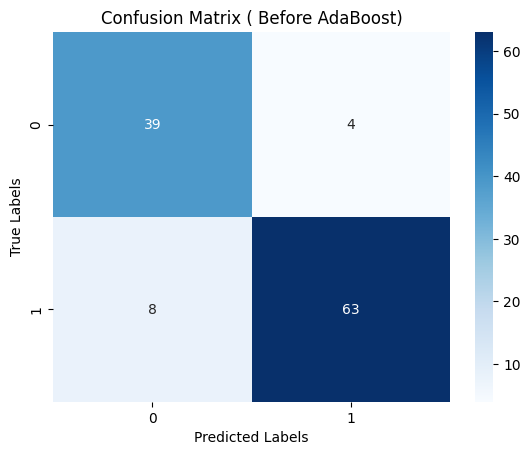

In [18]:
#lets examine how weak-learner perform before applying Adaboosting
d_stump = DecisionTreeClassifier(max_depth=1, random_state=42)
d_stump.fit(X_train, y_train)
y_pred_stump = d_stump.predict(X_test)
print('Decision Stump Accuracy:', accuracy_score(y_test, y_pred_stump))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_stump)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ( Before AdaBoost)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
##Building AdaBoost Model and tain the model
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)     #This D. tree is called Decision stump ( because its depth is low )

adaBoost = AdaBoostClassifier(
    estimator = base_learner,
    n_estimators=20,
    learning_rate=0.3,
    random_state=42
)

adaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.3, n_estimators=20, random_state=42)

AdaBoost Accuracy: 0.9649122807017544


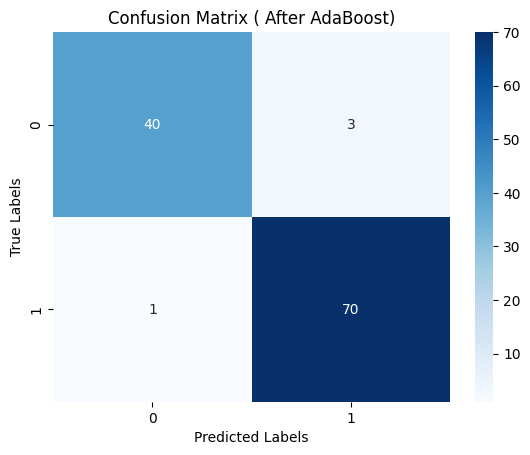

In [19]:
#make prediction and evaluatoin
y_pred_adaBoost = adaBoost.predict(X_test)

print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_adaBoost))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_adaBoost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ( After AdaBoost)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##Here we tried to see the differnce in accuracy between "Before applying AdaBoost" and "After applying AdaBoost"

##Now let's find out the best ( Hyper parameter ) using GridSearchCv:

In [22]:
# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [10,20, 50, 100,120,150,170, 200],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'estimator__max_depth': [1, 2]
}


#base model
adaBoost = AdaBoostClassifier(
    estimator = base_learner,
    random_state=42
)

#GridsearchCV
grid = GridSearchCV(
    estimator=adaBoost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)



grid.fit(X_train, y_train)

#find the best model
best_adaBoost = grid.best_estimator_
y_pred_best_adaBoost = best_adaBoost.predict(X_test)
print('Best AdaBoost Accuracy:', accuracy_score(y_test, y_pred_best_adaBoost))
print('Best Best Parameters are :', grid.best_params_)

Best AdaBoost Accuracy: 0.9736842105263158
Best Best Parameters are : {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 120}
